In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import pickle
from scipy.sparse import coo_matrix
from Bio import Phylo
import matplotlib.pyplot as plt
from collections import Counter
from tqdm.notebook import tqdm
import os
os.chdir('..')

In [33]:
import seaborn as sns

In [2]:
from mtDNAsim.sim_utils import *

/home/wangkun/mtDNA_simulation/mtDNAsim/sim_utils.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
plt.rcParams['font.size'] = 12

In [4]:
from scipy.sparse import coo_matrix
from tqdm.notebook import tqdm
from collections import Counter
def sparse_freq(cells):
    cell_names = list(cells.keys())
    max_mut_id = max([max([max(list(i)+[0]) for i in cells[j]]+[0]) for j in cell_names])
    
    _row, _col, _data = [], [], []
    with tqdm(total=len(cell_names)) as pbar:
        for ind, cell in enumerate(cells):
            cell_muts = sum([list(i) for i in cells[cell]], [])
            nmts = len(cells[cell])
            cnt = Counter(cell_muts)
            for mut in cnt:
                _col.append(mut)
                _row.append(ind)
                _data.append(cnt[mut]/nmts)
            pbar.update(1)
    return coo_matrix((_data, (_row, _col))).tocsr()

In [65]:
mt = pickle.load(open('/data3/wangkun/mtsim_res/res_1113/linear_/914990/mt_allmuts_mid_0.1_914990.pkl', 'rb'))

In [66]:
pre_id = max(sum([list(i) for i in mt['<0_0>']], []))

In [88]:
res = dict()
for gen in [15, 50, 100, 300, 800]:
    res[gen] = dict()
    mt = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/linear_/914990/mt_allmuts_mid_0.1_914990_{gen}.pkl', 'rb'))
    freq = sparse_freq(mt)
    pre_freq = freq[:, :pre_id+1]
    de_freq = freq[:, pre_id+1:]
    for cutoff in [0, 0.01, 0.05]:
        res[gen][cutoff] = dict()
        res[gen][cutoff]['pre'] = np.array(np.sum(pre_freq>cutoff, axis=1)).flatten()
        res[gen][cutoff]['de'] = np.array(np.sum(de_freq>cutoff, axis=1)).flatten()

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


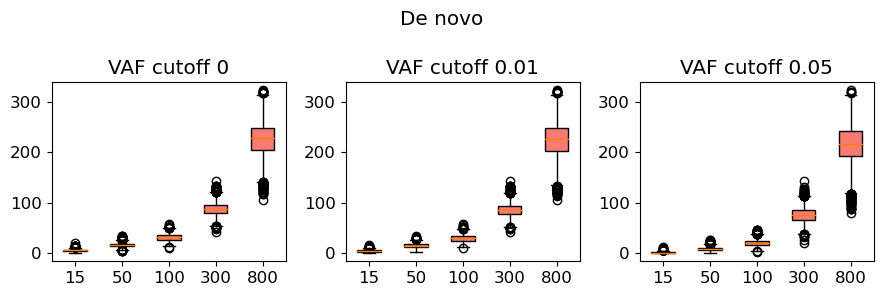

In [89]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
xrange=np.arange(1, 6)
for ind, cutoff in enumerate([0,0.01,0.05]):
    de_data = []
    pre_data = []
    for gen in [15, 50, 100, 300, 800]:
        pre_data.append(res[gen][cutoff]['pre'])
        de_data.append(res[gen][cutoff]['de'])
    bp1 = ax[ind].boxplot(de_data, positions=xrange, patch_artist=True)
    # bp2 = ax[ind].boxplot(pre_data, positions=xrange+0.2, patch_artist=True)
    for patch in bp1['boxes']:
        patch.set_facecolor('#f87b72')
    # for patch in bp2['boxes']:
    #     patch.set_facecolor('#28c9cd')
    ax[ind].set_xticks(xrange, [15, 50, 100, 300, 800])
    # ax[ind].set_yscale('log')
    ax[ind].set_title(f'VAF cutoff {cutoff}')
fig.suptitle('De novo')
plt.tight_layout()

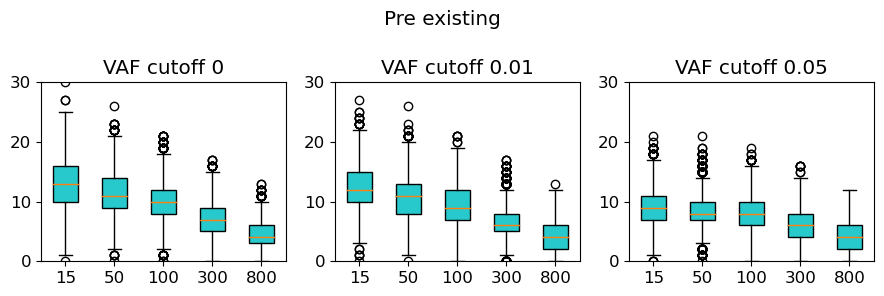

In [168]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
xrange=np.arange(1, 6)
for ind, cutoff in enumerate([0,0.01,0.05]):
    de_data = []
    pre_data = []
    for gen in [15, 50, 100, 300, 800]:
        pre_data.append(res[gen][cutoff]['pre'])
        de_data.append(res[gen][cutoff]['de'])
    # bp1 = ax[ind].boxplot(de_data, positions=xrange-0.2, patch_artist=True)
    bp2 = ax[ind].boxplot(pre_data, positions=xrange, patch_artist=True)
    # for patch in bp1['boxes']:
    #     patch.set_facecolor('#f87b72')
    for patch in bp2['boxes']:
        patch.set_facecolor('#28c9cd')
    ax[ind].set_xticks(xrange, [15, 50, 100, 300, 800])
    # ax[ind].set_yscale('log')
    ax[ind].set_title(f'VAF cutoff {cutoff}')
    ax[ind].set_ylim(0,30)
fig.suptitle('Pre existing')
plt.tight_layout()

In [360]:
res = dict()
for gen in [15, 50, 100, 300, 800]:
    res[gen] = dict()
    mt = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/linear_/914990/mt_allmuts_mid_0.1_914990_{gen}.pkl', 'rb'))
    # mt = rs_cvt(mt)
    freq = sparse_freq(mt)
    pre_freq = freq[:, :pre_id+1]
    de_freq = freq[:, pre_id+1:]
    for cutoff in [0, 0.01, 0.05]:
        res[gen][cutoff] = dict()
        res[gen][cutoff]['pre'] = np.array(np.sum(pre_freq>cutoff, axis=1)).flatten()
        res[gen][cutoff]['de'] = np.array(np.sum(de_freq>cutoff, axis=1)).flatten()

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

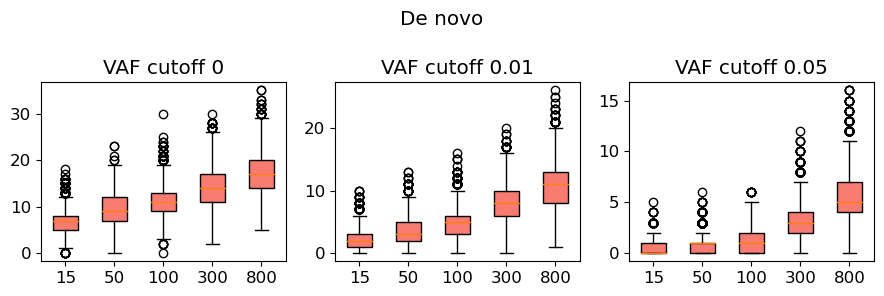

In [361]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
xrange=np.arange(1, 6)
for ind, cutoff in enumerate([0,0.01,0.05]):
    de_data = []
    pre_data = []
    for gen in [15, 50, 100, 300, 800]:
        pre_data.append(res[gen][cutoff]['pre'])
        de_data.append(res[gen][cutoff]['de'])
    bp1 = ax[ind].boxplot(de_data, positions=xrange, patch_artist=True)
    # bp2 = ax[ind].boxplot(pre_data, positions=xrange+0.2, patch_artist=True)
    for patch in bp1['boxes']:
        patch.set_facecolor('#f87b72')
    # for patch in bp2['boxes']:
    #     patch.set_facecolor('#28c9cd')
    ax[ind].set_xticks(xrange, [15, 50, 100, 300, 800])
    # ax[ind].set_yscale('log')
    ax[ind].set_title(f'VAF cutoff {cutoff}')
fig.suptitle('De novo')
plt.tight_layout()

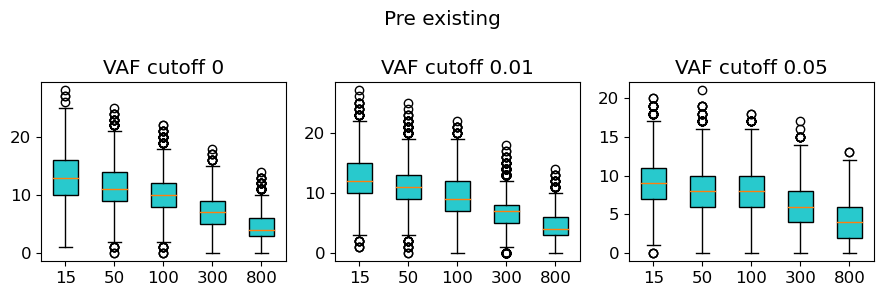

In [363]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
xrange=np.arange(1, 6)
for ind, cutoff in enumerate([0,0.01,0.05]):
    de_data = []
    pre_data = []
    for gen in [15, 50, 100, 300, 800]:
        pre_data.append(res[gen][cutoff]['pre'])
        de_data.append(res[gen][cutoff]['de'])
    # bp1 = ax[ind].boxplot(de_data, positions=xrange-0.2, patch_artist=True)
    bp2 = ax[ind].boxplot(pre_data, positions=xrange, patch_artist=True)
    # for patch in bp1['boxes']:
    #     patch.set_facecolor('#f87b72')
    for patch in bp2['boxes']:
        patch.set_facecolor('#28c9cd')
    ax[ind].set_xticks(xrange, [15, 50, 100, 300, 800])
    # ax[ind].set_yscale('log')
    ax[ind].set_title(f'VAF cutoff {cutoff}')
    # ax[ind].set_ylim(0,30)
fig.suptitle('Pre existing')
plt.tight_layout()

In [364]:
files = os.listdir("/data3/wangkun/mtsim_res/res_1113/linear_/")

In [378]:
cell_number = []
for f in tqdm(files):
    for gen in [15, 50, 100, 300, 800]:
        res[gen] = dict()
        mt = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/linear_/{f}/mt_allmuts_mid_0.1_{f}_{gen}_0.8_rs.pkl', 'rb'))
        mt = rs_cvt(mt)
        cell_number.append(len(mt.keys()))

  0%|          | 0/21 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '/data3/wangkun/mtsim_res/res_1113/linear_/rm/mt_allmuts_mid_0.1_rm_15_0.8_rs.pkl'

(array([ 4.,  2.,  5., 11., 22., 28., 18.,  6.,  1.,  3.]),
 array([2780. , 3194.4, 3608.8, 4023.2, 4437.6, 4852. , 5266.4, 5680.8,
        6095.2, 6509.6, 6924. ]),
 <BarContainer object of 10 artists>)

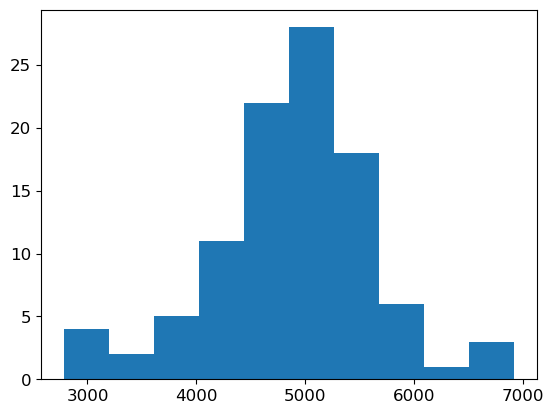

In [379]:
plt.hist(cell_number)

In [ ]:
res = dict()
for gen in [15, 50, 100, 300, 800]:
    res[gen] = dict()
    mt = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/linear_/914990/mt_allmuts_mid_0.1_914990_{gen}.pkl', 'rb'))
    freq = sparse_freq(mt)
    pre_freq = freq[:, :pre_id+1]
    de_freq = freq[:, pre_id+1:]
    for cutoff in [0, 0.01, 0.05]:
        res[gen][cutoff] = dict()
        res[gen][cutoff]['pre'] = np.array(np.sum(pre_freq>cutoff, axis=1)).flatten()
        res[gen][cutoff]['de'] = np.array(np.sum(de_freq>cutoff, axis=1)).flatten()

In [329]:
def cell_division_with_mt1(mt_muts, global_mutid, mut_rate, mt_copynumber=2, target_nmts=500):
    new_mts = []
    nmts = len(mt_muts)
    if nmts < target_nmts*0.8:
        mt_copynumber = 2.3
    elif nmts > target_nmts*1.2:
        mt_copynumber = 1.8
    else:
        mt_copynumber = 2
    
    if mt_copynumber == 2:
        new_mts = mt_muts*2
    elif mt_copynumber > 2:
        new_mts = mt_muts*2
        n_mts = len(mt_muts)
        addi = np.random.choice(range(n_mts), int(n_mts*(mt_copynumber-2)), replace=False)
        new_mts = new_mts + list(np.array(mt_muts)[addi])
    else:
        new_mts = mt_muts
        n_mts = len(mt_muts)
        addi = np.random.choice(range(n_mts), int(n_mts*(mt_copynumber-1)), replace=False)
        new_mts = new_mts + list(np.array(mt_muts)[addi])
        
    division = np.random.binomial(1, 0.5, len(new_mts)).astype(bool)
    while (np.sum(division) < min(0.4*len(new_mts), 100)) or (np.sum(~division) < min(0.4*len(new_mts), 100)):
        division = np.random.binomial(1, 0.5, len(new_mts)).astype(bool)
    cell1 = np.array(new_mts)[division]
    cell2 = np.array(new_mts)[~division]
    for i in np.random.choice(range(len(cell1)), np.random.poisson(mut_rate)):
        global_mutid += 1
        mt_new = deepcopy(cell1[i])
        mt_new.add(global_mutid)
        cell1[i] = mt_new
        
    for i in np.random.choice(range(len(cell2)), np.random.poisson(mut_rate)):
        global_mutid += 1
        mt_new = deepcopy(cell2[i])
        mt_new.add(global_mutid)
        cell2[i] = mt_new
    
    return list(cell1), list(cell2), global_mutid

In [348]:
mt_muts = [set() for _ in range(3)]

In [349]:
c1, c2, gm = cell_division_with_mt1(mt_muts, 0, 3, mt_copynumber=2, target_nmts=60)

In [350]:
c1

[{3}, {1, 2}, {4, 5}]

In [351]:
c2

[set(), {6}, set()]

In [282]:
%%timeit
c1, c2, gm = cell_division_with_mt1(mt_muts, 0, 3, mt_copynumber=2, target_nmts=60)

128 µs ± 2.55 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [331]:
%%timeit
c1, c2, gm = cell_division_with_mt1(mt_muts, 0, 3, mt_copynumber=2, target_nmts=60)

120 µs ± 946 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [245]:
%%timeit
c1, c2, gm = cell_division_with_mt1(mt_muts, 0, 3, mt_copynumber=2, target_nmts=60)

407 µs ± 6.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [250]:
mt_muts = [set() for _ in range(60)]

In [248]:
%%timeit
c1, c2, gm = cell_division_with_mt2(mt_muts, 0, 3, mt_copynumber=2, target_nmts=10)

523 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [251]:
%%timeit
c1, c2, gm = cell_division_with_mt2(mt_muts, 0, 3, mt_copynumber=2, target_nmts=10)

514 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [231]:
c2

[{6}, set(), {5, 7}]

In [ ]:
1